# Bienvenides

En esta notebook vamos a levantar un archivo con las respuestas de algun cuatrimestre del cursito de python de la FIFA con Pandas, y vamos también a trabajarlo un poco para ver qué tipo de cosas se pueden hacer y qué información sacar de los datos.

Las ideas que queremos transmitir en este ejemplo son:
  - Abrir un archivo csv y ver su informacion
  - Modificar sus columnas y entradas para hacerlo más ameno
  - Armar histogramas sobre columnas de los datos
  - Hacer plots entre dos columnas
  
      + __Bonus__: Una muestra de como trabajar con fechas en Python
      
  - Extraer informacion dada una cierta condicion
  - Manipular esa informacion para obtener solapamiento de inscriptos

In [1]:
import pandas as pd # PANDAS: la libreria que nos va a ayudar a manipular estos datos
import numpy as np # NUMPY: la vieja y confiable
import matplotlib.pyplot as plt # MATPLOTLIB: para los graficos que hagamos
import datetime # DATETIME: para manipular los datos de tipo fechas

%matplotlib notebook
# Aca traigo el archivo subido. Revisando el archivo vemos que el caracter
# que separa los campos es una coma ",", entonces lo declaro. Podría ser otra cosa
# como un punto y coma ";" o una tabulación "\t", etc...
respuestas = pd.read_csv("inscripcion_data.csv", sep=',')

# Usando notebooks (IPython en realidad) puedo abusarme de su interactividad y 
# printear cosas de forma fachera solamente dejando escrito su nombre en la celda
# >>>> OJO con esto <<<<
respuestas

,Timestamp,¿Que día/horarios te conviene? [Lunes],¿Que día/horarios te conviene? [Martes],¿Que día/horarios te conviene? [Miercoles],¿Que día/horarios te conviene? [Jueves],¿Que día/horarios te conviene? [Viernes],¿Cuantos sabes de programación?,¿Tenes algún tema o librería en particular que te gustaría aprender?(esta pregunta es opcional)
0,29/03/2020 18:04:09,Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),3,NaN
1,29/03/2020 18:09:10,Tarde(1330-1630),Tarde(1330-1630),Tarde(1330-1630),Tarde(1330-1630),Tarde(1330-1630),1,NaN
2,29/03/2020 18:21:25,Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),1,NaN
3,29/03/2020 18:22:11,"Mañana(1030-1330), Tarde(1330-1630), Noche(173...","Mañana(1030-1330), Tarde(1330-1630), Noche(173...","Mañana(1030-1330), Tarde(1330-1630), Noche(173...","Mañana(1030-1330), Tarde(1330-1630), Noche(173...","Mañana(1030-1330), Tarde(1330-1630), Noche(173...",3,Programación orientada a objetos
4,29/03/2020 18:34:15,Noche(1730-2030),Noche(1730-2030),Noche(1730-2030),Noche(1730-2030),Noche(1730-2030),1,NaN
...,...,...,...,...,...,...,...,...
166,04/04/2020 07:55:21,Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),1,NaN
167,04/04/2020 09:55:16,Ninguna,Tarde(1330-1630),Tarde(1330-1630),Tarde(1330-1630),Ninguna,1,NaN
168,04/04/2020 13:35:21,Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),Mañana(1030-1330),2,NaN
169,04/04/2020 13:40:15,Mañana(1030-1330),"Mañana(1030-1330), Tarde(1330-1630)",Mañana(1030-1330),"Mañana(1030-1330), Tarde(1330-1630)",Mañana(1030-1330),1,NaN


Es un poco molesto de ver asi la tabla, porque cada horario tiene mucha información que estaba en el form, pero ya no nos sirve, entones podemos reemplazar cada turno por algo mas corto, así como tambien cambiar las preguntas que también son muy largas.

Por ejemplo, el texto `Mañana(1030-1330)` tranquilamente puede ser modificado por algo mas corto como `Man` (asi tambien ahorramos la ñ que da para quilombo).
Lo mismo podria decirse de `Tarde(1330-1630)` -> `Tar`, idem noche y trasnoche.

Pasa lo mismo con las columnas: `¿Que día/horarios te conviene? [Lunes]` es demasiado largo (e innecesario) para escribir en el código, lo podesmos transformar directamente en `Lun`.

In [2]:
# Así cambio todos los nombres de las columnas de un tirón. Pisando los previos
respuestas.columns = ['Tiempo', 'Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Nivel', 'Extras']

# Para cambiar los datos del DataFrame, voy a usar la funcion replace.
# junto a las llamadas 'regex' o Regular Expressions 
# (quien quiera entenderlas, puede googlear, le deseamos mucha suerte)
#
# La opcion 'inplace' va a hacer que reemplace los datos donde los encuentra,
# En vez de generar un nuevo DataFrame con los datos corregidos
respuestas.replace({'Mañana\(1030-1330\)': 'Man',
                    'Tarde\(1330-1630\)': 'Tar',
                    'Noche\(1730-2030\)': 'Noc',
                    'Ninguna':"None"}, regex=True, inplace=True)
                                
respuestas

,Tiempo,Lun,Mar,Mie,Jue,Vie,Nivel,Extras
0,29/03/2020 18:04:09,Man,Man,Man,Man,Man,3,NaN
1,29/03/2020 18:09:10,Tar,Tar,Tar,Tar,Tar,1,NaN
2,29/03/2020 18:21:25,Man,Man,Man,Man,Man,1,NaN
3,29/03/2020 18:22:11,"Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc",3,Programación orientada a objetos
4,29/03/2020 18:34:15,Noc,Noc,Noc,Noc,Noc,1,NaN
...,...,...,...,...,...,...,...,...
166,04/04/2020 07:55:21,Man,Man,Man,Man,Man,1,NaN
167,04/04/2020 09:55:16,None,Tar,Tar,Tar,None,1,NaN
168,04/04/2020 13:35:21,Man,Man,Man,Man,Man,2,NaN
169,04/04/2020 13:40:15,Man,"Man, Tar",Man,"Man, Tar",Man,1,NaN


---
---
Algo trivial de hacer ahora es ver, por ejemplo, la distribución de nivel de la gente que está viniendo al taller. Esto puede servir para enfocar de diferentes maneras los temas que vamos a dar. O bien super básicos, o si podemos apretar más el acelerador y dar mas cosas.

<IPython.core.display.Javascript object>


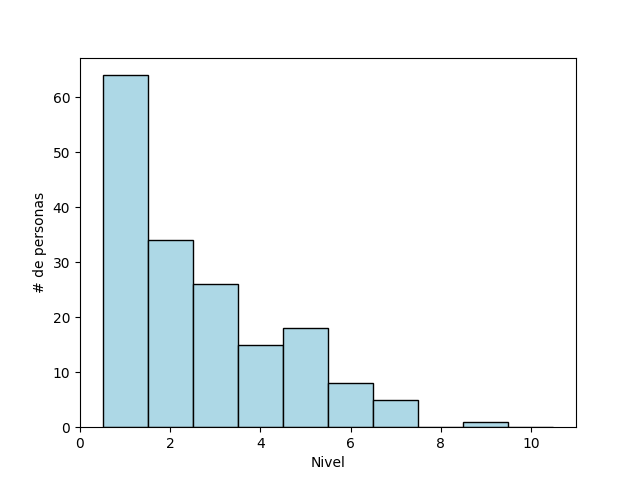

Text(0, 0.5, '# de personas')

In [3]:
# La funcion `hist` devuelve algunos parametros (pueden ver cuales haciendo `plt.hist?`)
# y por ahora no los necesito asi que le digo que no los guarde.
# En realidad, le digo que lo guarde en la variable "_", que es la forma usual
# de escribir "una variable que no me interesa guardar"
#
# Fijense que pasa si le sacan el "_ = " !!
#
_ = plt.hist(respuestas.Nivel, bins=np.arange(1, 12), \
             align='left', edgecolor='k', color='lightblue')

plt.xlabel("Nivel")
plt.ylabel("# de personas")

---
---

Supongan que nos interesa saber qué dia se anotaron mas personas, o a qué hora. Por ejemplo para saber cuándo hacer algún posteo en una red social, o lo que sea. Podemos hacerlo viendo el campo de `Time` que devuelve el formulario, que tiene las fechas y horas de cada envío de respuesta.

<IPython.core.display.Javascript object>


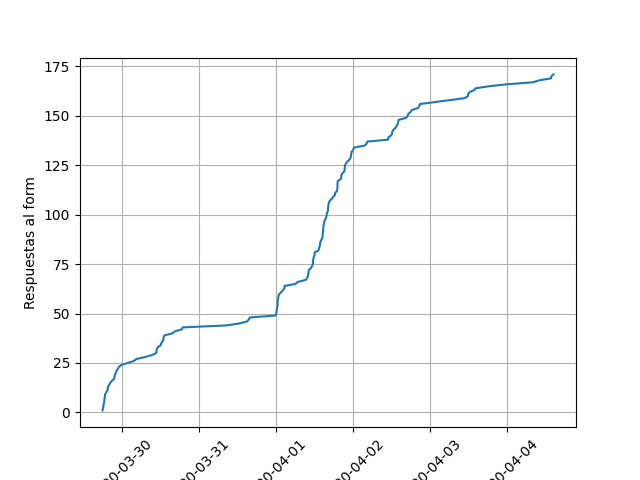

In [4]:
# Traigo las fechas, y las paso a un tipo de dato datetime.
# De esta forma matplotlib lo plotea bien y no se queja
dates = [datetime.datetime.strptime(date_str, '%d/%m/%Y %H:%M:%S') for date_str in respuestas.Tiempo.values]

# Esta linea de arriba es equivalente a escribir:
#     dates = [] # armo una lista vacia
#     for date_str in respuestas.Time.values: # recorro los timestamps
#         new_date = datetime.datetime.strptime(date_str, '%d/%m/%Y %H:%M:%S') # paso a tipo de dato correcto
#         dates.append(new_date) # guardo 


# Ordeno las fechas por si alguna se mezcló en el camino, y ploteo contra el id.
# en realidad solo necesito que vaya de uno en uno con cada fecha de ingreso
# sería lo mismo hacer algo como:
# plt.plot(sorted(dates), np.arange(len(dates)))

plt.plot(sorted(dates), respuestas.index+1)
plt.xticks(rotation=45) # Arreglo para que no se solapen las horas
plt.ylabel("Respuestas al form")
plt.grid()

---
---
Algo menos trivial sería ver como es el solape de inscripciones, para saber como distribuirnos los docentes los horarios. Si hay mucha gente a la mañana habrá que poner más gente en ese turno. Pero también es importante saber cuanta gente se anotó a mas de un turno, porque quizás se podría eliminar alguno de los turnos y distribuir a esa gente en los otros.

Una rudimentaria forma de hacerlo sería recorrer cada uno de los dias y horarios para cada alumno e ir almacenando la id de ese alumno, cosa de que poder ver fácilmente quien se anotó a qué dia y horario

In [153]:
dias = respuestas.columns[1:6].values
solape = {}
turnos = ['Man', 'Tar', 'Noc', 'None']

# Solape va a ser un diccionario con 5 entradas (una por cada dia)
# cada entrada va a tener otras tres (una por cada turno)
# y ahi guardaremos el id de la persona que se anotó a ese dia y horario
#
# Sería una cosa:
# Lun:
#     Man: {Persona1, ...}
#     Tar: {Persona25, ...}
#     Noc: {...}
#     None: {...}
#
# idem con los demas días
#
# Primero entonces inicializo todo vacio, pero para que ya esté la estructura armada
for dia in dias: 
    solape[dia] = {turn:set() for turn in turnos}

for index, fila in respuestas.iterrows(): # recorro todas las filas
    for dia in dias: # recorro todos los dias (que son las columnas 1:6)
        for turno in fila[dia].split(", "): # Aca me fijo y separo todos los dias que se anotó la persona
            solape[dia][turno].add(str(index)) # agrego a la persona a cada dia y turno apropiado

Ahora tenemos en `solape` todo distribuido ya con las personas ordenadas en los dias y turnos que eligió. Para ver efectivamente el solapamiento de horarios podemos ver la interseccion de cada set, justamente por este motivo es que elegimos usar un set, para poder intersecar fácilmente.

In [154]:
for dia in dias: # Voy a armar una "matriz de solape" por dia
    print(f"{dia}:")
    print("   \t","\t".join(turnos)) # Esta es la primer fila con los nombre de los turnos
    for turno_i in turnos:
        print(turno_i, end='\t') # La primer columna con nombres de turnos
        for turno_j in turnos: 
            # Aca interseco los dos sets con `&` y luego me fijo el largo del set
            # como son sets, no tengo que preocuparme por doble conteos nunca!!
            interseccion = len(solape[dia][turno_i] & solape[dia][turno_j])
            print(f"{interseccion}", end='\t') # printeo el valor y meto un tab
        print("") # agrego un salto de linea para ir a la siguiente fila
    print("\n\n")

Lun:
   	 Man	Tar	Noc	None
Man	76	35	21	0	
Tar	35	68	21	0	
Noc	21	21	68	0	
None	0	0	0	20	



Mar:
   	 Man	Tar	Noc	None
Man	76	38	21	0	
Tar	38	76	24	0	
Noc	21	24	67	0	
None	0	0	0	18	



Mie:
   	 Man	Tar	Noc	None
Man	80	40	20	0	
Tar	40	76	23	0	
Noc	20	23	64	0	
None	0	0	0	17	



Jue:
   	 Man	Tar	Noc	None
Man	72	37	22	0	
Tar	37	71	21	0	
Noc	22	21	65	0	
None	0	0	0	25	



Vie:
   	 Man	Tar	Noc	None
Man	84	47	28	0	
Tar	47	84	31	0	
Noc	28	31	68	0	
None	0	0	0	17	





Y bueno, así de fácil (fácil?) se pudo saber como es la distribución de inscriptos en cada horario, y cómo fue el solapamiento de turnos. Obvio que esto tambien se podría visualizar en un heatmap, o algo por el estilo, pero todas esas cosas extra se las dejamos para ustedes para experimentar.

Esto puede parecer al pedo, pero quizas está bueno por si realmente se decide en base a estos datos sacar un turno. Por ejemplo, si se decide eliminar el turno tarde del Lunes, se le podría enviar un mail a aquellos que se anotaron a la tarde y noche, pidiendoles que se anoten de noche, y a los que se anotaron mañana-tarde que se anoten a la mañana!

Abajo les dejamos eso hecho con el id del inscripto. El formulario tambien nos dice a nosotros sus mails, pero no divulgaríamos esa informacion! De cualquier manera el procedimiento sería el mismo, salvo que al final printeariamos los mails de forma tal de luego poder copiar y pegarlos y enviarles el mail a todos juntos.

In [194]:
gente_man_tar = respuestas.loc[(respuestas.Lun == 'Man, Tar')]
gente_man_tar
# Aca si estuviera el campo Email podriamos hacer
# print(gente_man_tar[Email])
# Y mandarles el mail

,Tiempo,Lun,Mar,Mie,Jue,Vie,Nivel,Extras
3,29/03/2020 18:22:11,"Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc",3,Programación orientada a objetos
17,29/03/2020 21:46:11,"Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc",5,NaN
21,29/03/2020 22:51:49,"Man, Tar",None,"Man, Tar","Man, Tar","Man, Tar",1,NaN
26,30/03/2020 04:35:31,"Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc",2,NaN
28,30/03/2020 09:26:26,"Man, Tar, Noc",Man,Man,"Man, Tar, Noc","Man, Tar, Noc",7,NaN
35,30/03/2020 12:44:55,"Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc","Man, Tar, Noc",3,Animaciones
40,30/03/2020 16:34:50,"Man, Tar","Man, Tar","Man, Tar","Man, Tar","Man, Tar",3,NaN
43,31/03/2020 08:34:47,"Man, Tar","Man, Tar","Man, Tar","Man, Tar","Man, Tar",5,NaN
50,01/04/2020 00:11:25,"Man, Tar","Man, Tar","Man, Tar","Man, Tar","Man, Tar",3,NaN
53,01/04/2020 00:30:13,"Man, Tar","Man, Tar","Man, Tar","Man, Tar","Man, Tar",1,NaN
